inceptionv2与v3发表在同一篇论文"Rethinking the Inception Architecture for Computer Vision"中，通过将5x5的卷积分解成两个3x3卷积、进一步将3x3的卷积分解成1x3与3x1的非对称卷积（属于factorized convolution中的一种，后面的深度可分离卷积在channel上进行分离，同样属于facrorized conv的一种）来对v1版本的inception进行改进，另外用label smoothing、BN等方法提升网络精度。

大型网络如Alexnet、VGG等只考虑了模型的精度，而忽略了实时性，难以在计算与存储资源受限的平台部署。GoogLenet虽然计算高效，但仍有进一步优化的空间。而GoogLenet的优化较困难，不能通过简单的对v1版本进行scale(如统一增加各特征图维度)来提升，因此作者首先提出了4个网络设计的原则：<br/>
1)避免表征性瓶颈(representational bottlenecks)。即避免在网络开始就将特征图的尺寸减少过多，如开始就将特征图尺寸减少一半，这会严重损害原始信息，网络的设计应该缓慢减小尺寸。<br/>
2)高维度特征更容易处理，应在每一层逐渐增加特征图维度，以生成独立性较强的特征。<br/>
3)空间聚合（spatial aggregation）可以在低维度的特征图进行，而不损失过多或任何特征表达能力，如在3x3卷积前先用1x1卷积降维。<br/>
4)权衡网络的深度与宽度。

大尺寸卷积分解成小尺寸卷积:<br/>
大尺寸卷积计算量较大，以此可以等效地分解成几个小尺寸卷积堆叠的形式，如下图所示，5x5的卷积可以分解成两个3x3的卷积，实验证明不会损失精度
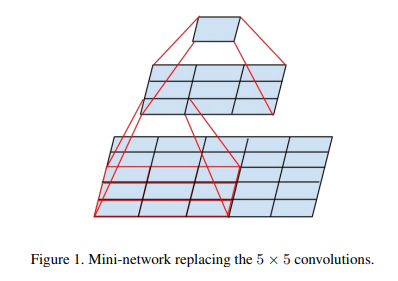

卷积分解为非对称卷积：<br/>
卷积可分解为非对称卷积，从而进一步减少计算量。如下图所示，将3x3的卷积分解为1x3的卷积与3x1的卷积，卷积核尺寸越大，计算量减少越多。这种分解方式在网络早期效果不明显，但当特征图尺寸中等时，计算量减少较多。如下图6所示，17x17的特征图用1x7与7x1的卷积计算。
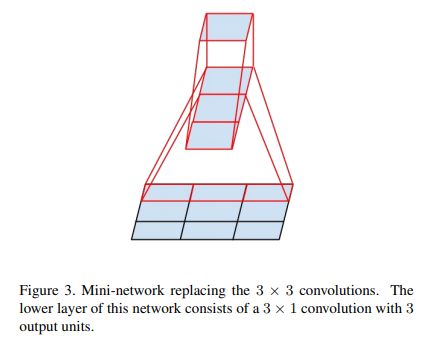

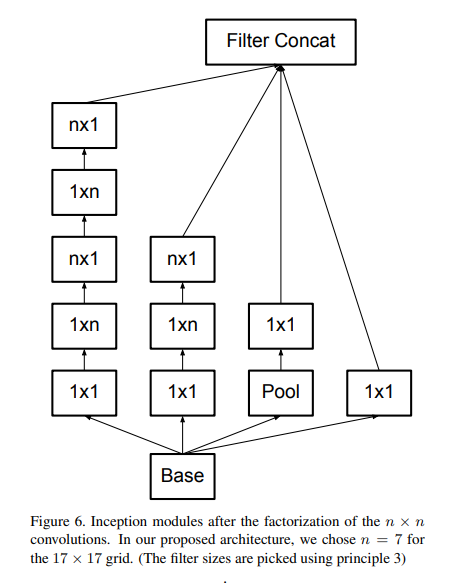

auxiliary classifier的使用：额外的分类子网络在加入BN层或dropou层后，会提升主分类器的性能，这表明副分类器起到正则化的效果。

高效的特征图尺寸缩减（reduction layer）：目前对于特征图缩减方式一般是采用pooling层，但首先用1x1卷积扩充维度，如输入是dxdxk的特征图，首先用1x1卷积扩充到dxdx(2k)，然后利用pooling将尺寸缩减至(d/2)x(d/2)x(2k)。这样大部分计算量集中在1x1卷积上。为此作者提出了一种高效的特征图尺寸缩减方法：逻辑关系图如下图所示，即用卷积与pooling层共同参与尺寸缩减，具体的网络结构如下图2所示。即两路conv（输出维度均为160）与一路pooling共同进行尺寸缩减。
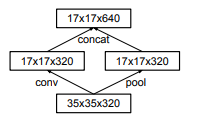

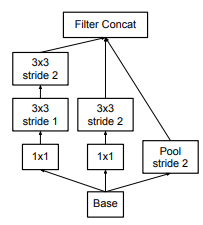

Inception-v2：最终将上述网络结构进行合并，形成inceptionv2结构如下表所示。其中figure5、figure6、figure7结构见后续图。
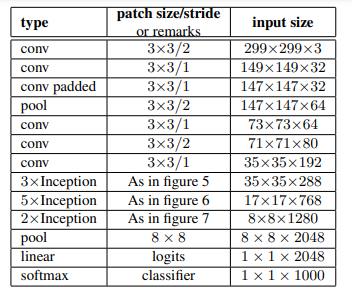

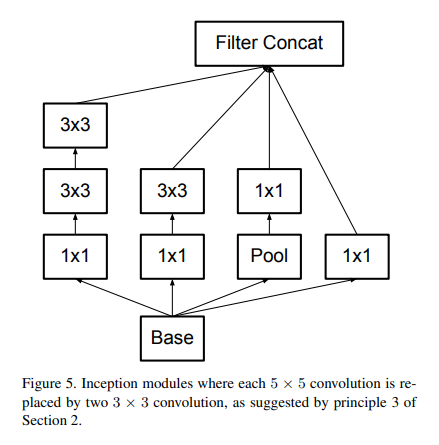

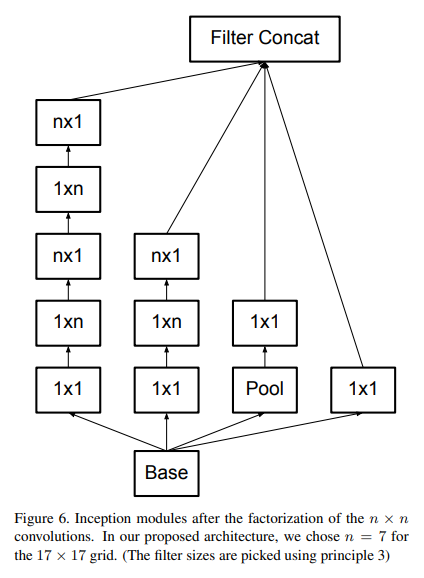

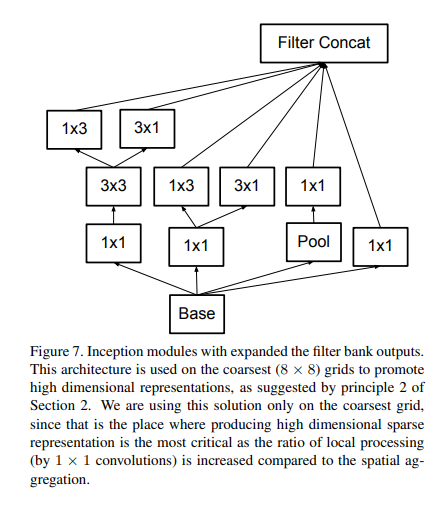

Label smoothing的应用：见ML_DL_base/loss/label smoothing

训练细节：应用RMSProp优化算法，应用grad clipping以稳定训练。

在低像素上的表现：将输入尺寸改为299x299、151x151、79x19并对网络结构做相应更改。可以发现输入尺寸对于分类效果的影响很小。

inceptionv3:在副分类器上使用BN，而不只是在主分支上使用BN，这个版本的inception成为inceptionv3